In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 日本語フォントの設定 macOSの場合
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 警告を無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
# データ作成
data = { #データの変数、内容を定義
    '受講前後': ['受講前']*15 + ['受講後']*15, # 前と後を15人ずつ
    '自信度': [2, 1, 3, 2, 2, 3, 1, 2, 3, 2, 1, 3, 2, 2, 3, 3, 3, 4, 3, 4, 4, 2, 3, 5, 3, 3, 4, 4, 3, 4]
}
df = pd.DataFrame(data) # pandasのDataFrameに変換

# データの表示
print(df) # 中身確認
print("\nデータの形状:", df.shape) # 改行しながらデータを表示

   受講前後  自信度
0   受講前    2
1   受講前    1
2   受講前    3
3   受講前    2
4   受講前    2
5   受講前    3
6   受講前    1
7   受講前    2
8   受講前    3
9   受講前    2
10  受講前    1
11  受講前    3
12  受講前    2
13  受講前    2
14  受講前    3
15  受講後    3
16  受講後    3
17  受講後    4
18  受講後    3
19  受講後    4
20  受講後    4
21  受講後    2
22  受講後    3
23  受講後    5
24  受講後    3
25  受講後    3
26  受講後    4
27  受講後    4
28  受講後    3
29  受講後    4

データの形状: (30, 2)


In [3]:
df.describe()

,自信度
count,30.000000
mean,2.800000
std,0.996546
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


<Figure size 300x200 with 0 Axes>

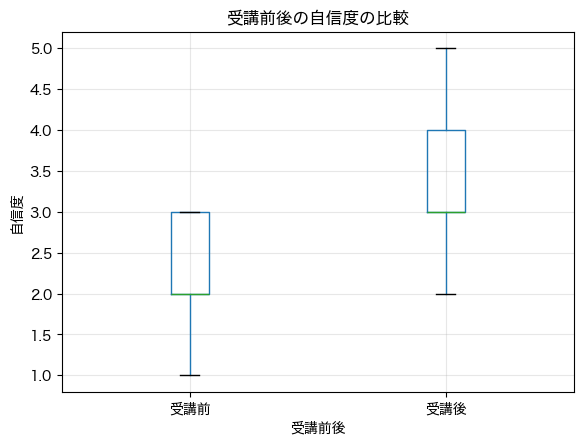

In [4]:
# データの可視化
plt.figure(figsize=(3, 2))

# 箱ひげ図
df.boxplot(column='自信度', by='受講前後') # column→縦軸、by→何事に変えるか
plt.title('受講前後の自信度の比較')  # タイトルを設定
plt.suptitle('')  # デフォルトのタイトルを削除
plt.ylabel('自信度')  # y軸のラベルを設定
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# Mann-Whitney U検定
twenty_scores = df[df['受講前後']=='受講前']['自信度']
forty_scores = df[df['受講前後']=='受講後']['自信度']

stat, p_value = stats.mannwhitneyu(twenty_scores, forty_scores, alternative='two-sided')
print(f"Mann-Whitney U検定の結果:")
print(f"U統計量: {stat}")
print(f"p値: {p_value:.4f}")
print(f"\n結果の解釈:")
if p_value < 0.05:
    print("p < 0.05: 受験前、受験後で自信度に統計的に有意な差があります。")
else:
    print("p >= 0.05: 受験前、受験後で評価に統計的に有意な差はありません。")

# p値だけレポートに載せるで大丈夫
# サンプル数が多いと有意なさが出やすい

Mann-Whitney U検定の結果:
U統計量: 26.0
p値: 0.0002

結果の解釈:
p < 0.05: 受験前、受験後で自信度に統計的に有意な差があります。
